<a href="https://colab.research.google.com/github/alaaguedda/python-Colab-Trainer/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list  # To check popular datasets
!kaggle datasets download -d <dataset-id>
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d adilshamim8/salaries-for-data-science-jobs
!unzip salaries-for-data-science-jobs.zip
df = pd.read_csv("salaries.csv")  # Use the actual file name if different


Saving kaggle.json to kaggle.json
ref                                                                     title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
urvishahir/electric-vehicle-specifications-dataset-2025                 Electric Vehicle Specs Dataset (2025)🔋🚗                  16631  2025-06-20 07:14:56.777000           7591        188  1.0              
divyaraj2006/social-media-engagement                                    social media engagement                                   2142  2025-07-02 15:34:21.323000           3667         73  1.0              
sahilislam007/college-student-placement-factors-dataset                 College Student Placement Factors Dataset               110450

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_clean = df.dropna(subset= ['job_title'])

job_counts = df_clean['job_title'].value_counts()
top5 = job_counts[:7]
others = job_counts[7:].sum()

final_counts = pd.concat([top5 , pd.Series({'Others':others})])

plt.figure(figsize=(8, 8))
def label_inside(pct, allvals):
    absolute = int(round(pct/100 * sum(allvals)))
    index = list(final_counts.values).index(absolute)
    return f"{final_counts.index[index]}\n{pct:.1f}%"

plt.pie(
    final_counts,
    labels=None,
    autopct=lambda pct: label_inside(pct, final_counts),
    startangle=140,
    textprops={'fontsize': 9}
)
plt.title("Top 5 Job Titles vs Others (Name + % Inside)")

plt.axis("equal")
plt.show()

In [ ]:
top5_saleries = df.sort_values(by='salary_in_usd', ascending =False)
top5_saleries[['job_title','company_location','salary_in_usd']].head(10)

In [ ]:
df_exp = df.groupby('experience_level')['salary_in_usd'].mean()
df_exp.sort_values()

In [ ]:
df_exp_job = df['experience_level'].value_counts().sort_index()

df_exp_job.plot(kind = 'bar')
plt.title('job titles for experiance')
plt.xlabel('expeciance level')
plt.ylabel('job')
plt.grid(axis='y')
plt.show()

In [ ]:
bins = [0, 10000, 30000, 50000, 70000, 90000, 120000, 150000, 200000, 250000, 300000, 350000, float('inf')]

# Define readable labels for those ranges
labels = [
    '<10k', '10k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-120k', '120k-150k',
    '150k-200k', '200k-250k', '250k-300k', '300k-350k', '>350k'
]

df['salary_range'] = pd.cut(df['salary_in_usd'] , bins=bins ,labels = labels ,right= False)
df

In [ ]:
salary_count = df['salary_range'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
salary_count.plot(kind='bar')
plt.title('Salary Distribution by Custom Ranges')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x='employment_type',y='salary_in_usd')
plt.xlabel('employment')
plt.ylabel('salary')
plt.show()

In [ ]:
remote = df['remote_ratio'].value_counts()
remote.plot(kind = 'pie')


In [ ]:
avg_Salary = df.groupby('job_title')['salary_in_usd'].median().sort_values( ascending =False)
top10_avg = avg_Salary.head(10)
top10_avg.plot(kind='barh')
plt.show()

In [ ]:
sal_country = df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending = False)
sal_country

In [ ]:
filt = df[df['remote_ratio'].isin([0,100])]
remote_comp = filt.groupby('remote_ratio')['salary_in_usd'].median()

plt.pie(

    remote_comp,
    labels=remote_comp.index,
    startangle=140,
    autopct= '%1.1f%%',
    textprops={'fontsize': 9}
)

In [ ]:
avg_year = df.groupby('work_year')['salary_in_usd'].median()
avg_year.plot(kind='line')


In [ ]:
top6_jobs = df['job_title'].value_counts().head(6).index
top_jobs_df = df[df['job_title'].isin(top6_jobs)]
job_demand_per_year = top_jobs_df.groupby(['work_year','job_title']).size().unstack(fill_value=0)
job_demand_per_year.plot(kind='line',marker='o', figsize=(12, 6))

In [ ]:
senior_dev_df = df[df['experience_level'].isin(['SE'])]
best_countries = senior_dev_df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)
best_countries.plot(kind='barh')
plt.gca().invert_yaxis()  # Optional: puts highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
remote_salery_per_level = df.groupby(['experience_level','remote_ratio']).agg({'salary_in_usd': 'mean'}).reset_index()
#remote_salery_per_level.plot(kind='bar')
sns.barplot(data=remote_salery_per_level, x='experience_level', y='salary_in_usd', hue='remote_ratio')

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
company_size_salary_per_exp = df.groupby(['experience_level','company_size']).agg({'salary_in_usd': 'mean'}).reset_index()
#remote_salery_per_level.plot(kind='bar')
sns.barplot(data = company_size_salary_per_exp, x='experience_level', y='salary_in_usd', hue='company_size')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clear style
sns.set(style='whitegrid')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df.head(500),
    x='remote_ratio',
    y='salary_in_usd',
    hue='experience_level',
    alpha=0.9,              # Transparency for readability
    palette='Set2'          # Distinct colors for each level
)

# Add titles and labels


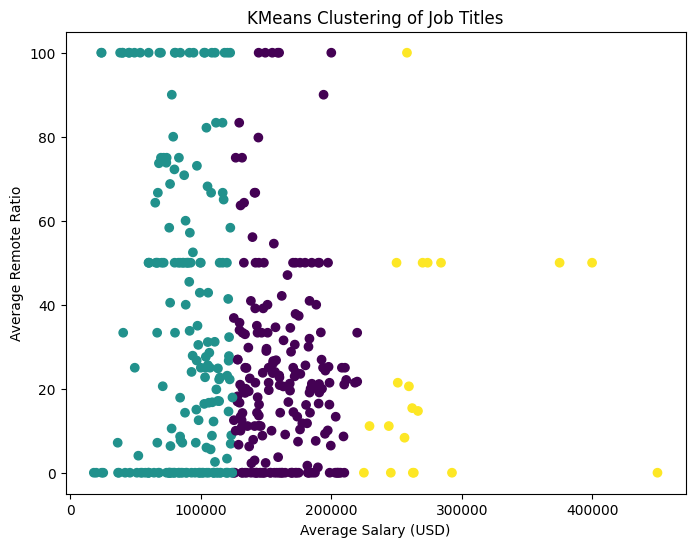

In [37]:
job_clusters_df = df.groupby('job_title')[['salary_in_usd', 'remote_ratio']].mean().reset_index()
X = job_clusters_df[['salary_in_usd', 'remote_ratio']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)  # choose 3 or more clusters
job_clusters_df['cluster'] = kmeans.fit_predict(X)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X['salary_in_usd'], X['remote_ratio'], c=job_clusters_df['cluster'], cmap='viridis')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Average Remote Ratio')
plt.title('KMeans Clustering of Job Titles')
plt.show()
